In [1]:
import numpy as np
import scipy
import scipy.fft
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.io
import librosa
np.set_printoptions(threshold=100)

# Import Sound File from Library

In [2]:
file = librosa.load('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/data/Startingfile.wav')
file

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8401162e-05,
        1.7894254e-04, 2.4782095e-04], dtype=float32), 22050)

In [3]:
sample_rate = file[1]
samples = file[0]
print(str(sample_rate) + " is the sample rate" + " , " + str(len(samples)) + " samples in file")

22050 is the sample rate , 136857 samples in file


In [4]:
# Play original file
from IPython.display import Audio
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/data/Startingfile.wav')

In [5]:
# length of .wav file in seconds
duration = int(len(samples)/sample_rate)
print("input .wav file is about" + " " + str(duration) + " " + "seconds long")

input .wav file is about 6 seconds long


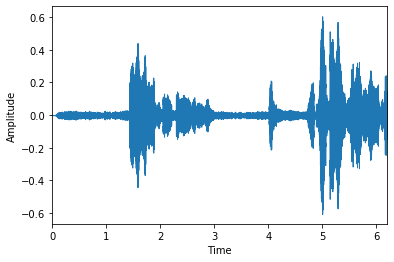

In [6]:
# plot soundwave
from librosa import display
plt.figure()
librosa.display.waveplot(y = samples, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [7]:
# define fft functions

def fft_plot(sound, rate):
    n = len(sound)
    T = 1/sample_rate
    y = (scipy.fft.fft(sound)) # scipy fft algorithm 
    x = np.linspace(0, 1.0/(2.0*T), n/2) #scales x axis
    mainplt, ax = plt.subplots()
    ax.plot(x, 2.0/n * np.abs(y[:n//2])) #turns negative compelx numbers to positive
    plt.grid()
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    return plt.show()


def fft_deep_plot(sound, rate):
    n = len(sound)
    T = 1/sample_rate
    y = (scipy.fft.fft(sound) - 50)
    x = np.linspace(0, 1.0/(2.0*T), n/2) #scales x axis
    mainplt, ax = plt.subplots()
    ax.plot(x, 2.0/n * np.abs(y[:n//2])) #turns negative compelx numbers to positive
    plt.grid()
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    return plt.show()

def fft_array(sound, rate): # 
    n = len(sound)
    T = 1/sample_rate
    y = scipy.fft.fft(sound)
    return y


def fft_array_deep(sound, rate): # 
    n = len(sound)
    T = 1/sample_rate
    y = (scipy.fft.fft(sound) - 50)
    return y


In [8]:
longarray = fft_array(samples, sample_rate)
longarray[0:40] # first 40 elements

array([ 0.7621708 -0.j        , -1.1652703 +0.88283086j,
        0.35825932-1.5857176j , -0.8785671 +0.8092307j ,
       -1.3627998 +1.5586596j , -1.0242847 +0.7283529j ,
        0.584527  -1.2241337j , -2.300598  +1.1118681j ,
        1.2984052 +0.5503695j , -1.7731552 -0.44656837j,
       -1.2037542 +1.5780263j , -0.6652187 +0.32625052j,
       -1.6966699 -1.5333097j , -0.26169395-0.6092026j ,
       -0.3018055 +0.7114515j , -1.4514705 -1.0164379j ,
       -0.27284527+0.6583358j , -0.3312164 +0.8880477j ,
        0.67196584-1.1975565j , -0.2843039 +0.5501405j ,
       -0.81065774+0.11726108j,  0.8079947 +0.6412027j ,
       -0.7282331 -0.35277557j, -1.1456177 -1.3300402j ,
       -0.34655118-0.07980609j,  1.0636355 +0.33485615j,
        0.33731878-0.09421086j, -1.3587817 -0.30443406j,
       -0.3601433 +0.803877j  ,  0.56984824-0.04435885j,
       -1.1845149 +0.5772517j , -1.8911606 +0.46535826j,
       -2.3176877 -1.3860741j , -0.54741764+0.38357472j,
        0.39312297+0.5401077j ,

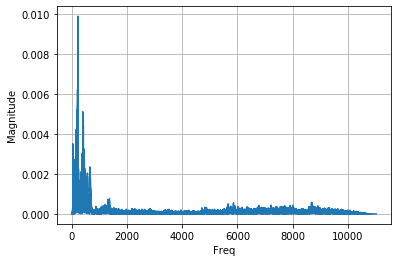

In [9]:
fft_plot(samples, sample_rate)

In [10]:
long_array_deep = fft_array_deep(samples, sample_rate)
long_array_deep[:30]

array([-49.23783 -0.j        , -51.16527 +0.88283086j,
       -49.64174 -1.5857176j , -50.878567+0.8092307j ,
       -51.3628  +1.5586596j , -51.024284+0.7283529j ,
       -49.415474-1.2241337j , -52.3006  +1.1118681j ,
       -48.701595+0.5503695j , -51.773155-0.44656837j,
       -51.203754+1.5780263j , -50.66522 +0.32625052j,
       -51.69667 -1.5333097j , -50.261696-0.6092026j ,
       -50.301804+0.7114515j , -51.45147 -1.0164379j ,
       -50.272846+0.6583358j , -50.331215+0.8880477j ,
       -49.328033-1.1975565j , -50.284306+0.5501405j ,
       -50.810658+0.11726108j, -49.192005+0.6412027j ,
       -50.728233-0.35277557j, -51.14562 -1.3300402j ,
       -50.34655 -0.07980609j, -48.936363+0.33485615j,
       -49.66268 -0.09421086j, -51.35878 -0.30443406j,
       -50.36014 +0.803877j  , -49.430153-0.04435885j], dtype=complex64)

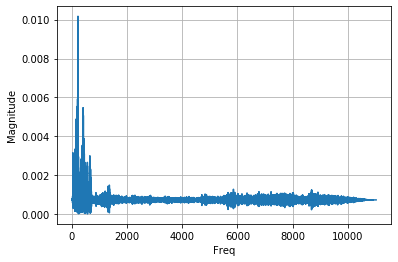

In [11]:
fft_deep_plot(samples, sample_rate)

In [12]:
from scipy import ifft
inverse_data = scipy.fft.irfft(long_array_deep)

In [13]:
inverse_data[:30]

array([-4.9999996e+01, -1.6777797e-06,  1.3504363e-06, -1.4199989e-06,
        1.3905681e-06, -1.3860915e-06,  1.3415207e-06, -1.3200560e-06,
        1.3656618e-06, -1.3834222e-06,  1.3067753e-06, -1.3495089e-06,
        1.2827247e-06, -1.3196029e-06,  1.2828625e-06, -1.2452539e-06,
        1.1821849e-06, -1.1051138e-06,  1.1412772e-06, -1.1469642e-06,
        1.0918724e-06, -1.2168648e-06,  1.1925865e-06, -1.0665447e-06,
        1.0597157e-06, -1.1100817e-06,  1.0616517e-06, -1.0979813e-06,
        1.0962158e-06, -9.5810310e-07], dtype=float32)

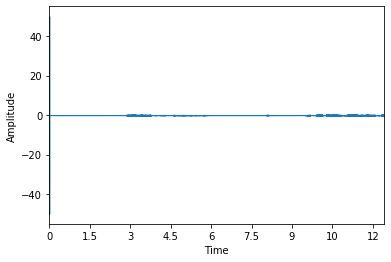

In [14]:
plt.figure()
librosa.display.waveplot(y = inverse_data, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [15]:
#inverse_data = [sample_rate, inverse_data]

In [16]:
from scipy.io.wavfile import write
write("new_1.wav", sample_rate, inverse_data)

In [17]:
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/new_1.wav')

# Implementation of the DFT algorithm (From a 1D sound file)

In [19]:
x = np.asarray(samples, dtype=float)[:-1]
print(x)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.43795283e-05
  2.84011621e-05  1.78942544e-04]


In [48]:
N = x.shape[0]
N

136856

In [49]:
n = np.arange(N)
n

array([     0,      1,      2, ..., 136853, 136854, 136855])

In [50]:
k = n.reshape((N, 1))
k

array([[     0],
       [     1],
       [     2],
       ...,
       [136853],
       [136854],
       [136855]])

In [23]:
#too long and computationally expensive to be run in a reasonable amount of time
#M = np.exp(-2j * np.pi * k * n / N)
#M

In [24]:
# Algorithm Blueprint
def myfft(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    N = x.shape[0]
    
    X_even = myfft(x[::2])
    X_odd = myfft(x[1::2])
    n_idx = np.arange(N)
    factor = W_N(N,n_idx, 1)
    return np.concatenate([X_even + factor[:N // 2] * X_odd,
          
                            X_even + factor[N // 2:] * X_odd])

In [25]:
np.log2(N)

17.062299160732607

In [52]:
# approximate to 17 (rounding down)
2**np.floor(np.log2(N))

131072.0

In [53]:
N - 2**np.floor(np.log2(N))

5784.0

# Make size a power of 2 

In [28]:
# Size must be a power of 2

x_new = np.asarray(x, dtype=float)[5784:]
print(x_new)

[-5.00319619e-03 -5.16647799e-03 -5.86253731e-03 ... -6.43795283e-05
  2.84011621e-05  1.78942544e-04]


In [29]:
N_new = x_new.shape[0]
N_new

131072

In [30]:
N_min = min(N, 32)
N_min

32

In [31]:
n_new = np.arange(N_min)
n_new

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [32]:
k_new = n_new[:, None]
k_new

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31]])

In [33]:
D = np.exp(-1j * 2 * np.pi * k_new * n_new / N_min)
D, D.shape

(array([[ 1.        +0.j        ,  1.        +0.j        ,
          1.        +0.j        , ...,  1.        +0.j        ,
          1.        +0.j        ,  1.        +0.j        ],
        [ 1.        +0.j        ,  0.98078528-0.19509032j,
          0.92387953-0.38268343j, ...,  0.83146961+0.55557023j,
          0.92387953+0.38268343j,  0.98078528+0.19509032j],
        [ 1.        +0.j        ,  0.92387953-0.38268343j,
          0.70710678-0.70710678j, ...,  0.38268343+0.92387953j,
          0.70710678+0.70710678j,  0.92387953+0.38268343j],
        ...,
        [ 1.        +0.j        ,  0.83146961+0.55557023j,
          0.38268343+0.92387953j, ..., -0.19509032-0.98078528j,
          0.38268343-0.92387953j,  0.83146961-0.55557023j],
        [ 1.        +0.j        ,  0.92387953+0.38268343j,
          0.70710678+0.70710678j, ...,  0.38268343-0.92387953j,
          0.70710678-0.70710678j,  0.92387953-0.38268343j],
        [ 1.        +0.j        ,  0.98078528+0.19509032j,
          0.9

In [34]:
X = np.dot(D, x_new.reshape((N_min, -1)))
X, X.shape

(array([[ 0.12300762+0.j        , -0.08968754+0.j        ,
         -0.21491914+0.j        , ..., -0.09606829+0.j        ,
          0.08810392+0.j        , -0.21933706+0.j        ],
        [ 0.07704234-0.56069211j, -0.13665222-0.70750938j,
         -0.23009925-0.74228442j, ...,  0.00655999-0.68751194j,
          0.13707287-0.55273612j, -0.08814974-0.80649076j],
        [-0.12617351-0.31313241j, -0.27336243-0.51297254j,
         -0.33684675-0.62237732j, ...,  0.06414879-0.53189693j,
          0.04278978-0.37039893j,  0.00482   -0.71606569j],
        ...,
        [ 0.28613095-0.36976109j,  0.29230106-0.19159937j,
          0.28023608-0.09667212j, ...,  0.26764954-0.30266948j,
          0.09295988-0.45241702j,  0.29446993-0.22823324j],
        [-0.12617351+0.31313241j, -0.27336243+0.51297254j,
         -0.33684675+0.62237732j, ...,  0.06414879+0.53189693j,
          0.04278978+0.37039893j,  0.00482   +0.71606569j],
        [ 0.07704234+0.56069211j, -0.13665222+0.70750938j,
         -0.2

In [39]:
def calculate(x):
    
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    N = x.shape[0]

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n_new = np.arange(N_min)
    k_new = n_new[:, None]
    D = forrier(N_min, n_new, k_new)
    X = np.dot(D, x.reshape((N_min, -1)))
    print(n_new, k_new, D, X)

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = forrier(X.shape[0], np.arange(X.shape[0]), 0.5)[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])
    
    print(factor, X)
        
    return X.ravel()


In [40]:
calculate(x_new)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]] [[ 1.        +0.j          1.        +0.j          1.        +0.j
  ...  1.        +0.j          1.        +0.j
   1.        +0.j        ]
 [ 1.        +0.j          0.98078528-0.19509032j  0.92387953-0.38268343j
  ...  0.83146961+0.55557023j  0.92387953+0.38268343j
   0.98078528+0.19509032j]
 [ 1.        +0.j          0.92387953-0.38268343j  0.70710678-0.70710678j
  ...  0.38268343+0.92387953j  0.70710678+0.70710678j
   0.92387953+0.38268343j]
 ...
 [ 1.        +0.j          0.83146961+0.55557023j  0.38268343+0.92387953j
  ... -0.19509032-0.98078528j  0.38268343-0.92387953j
   0.83146961-0.55557023j]
 [ 1.        +0.j          0.92387953+0.38268343j  0.70710678+0.70710678j
  ...  0.38268343-0.92387

array([ 0.66336266+0.j        , -1.35580128+0.81173031j,
        0.73577896-1.3286252j , ..., -0.87047294-0.34280878j,
        0.73577896+1.3286252j , -1.35580128-0.81173031j])

In [41]:
def myfft_vec(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    N = x.shape[0]

    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n_idx = np.arange(N_min)
    k_idx = n_idx[:, None]
    D = W_N(N_min, n_idx, k_idx)
    X = np.dot(D, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = W_N(X.shape[0], np.arange(X.shape[0]), 0.5)[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()


def forrier(N,k,n):
    return np.exp(-1j * 2 * np.pi * k * n / N)

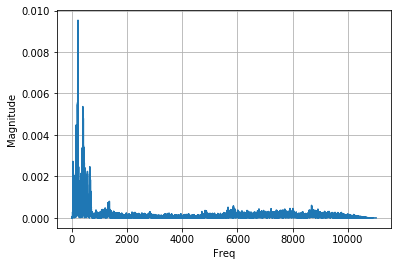

In [43]:
fft_plot(x_new, sample_rate)

In [45]:
fft_array(samples, sample_rate)

array([ 0.7621708 -0.j        , -1.1652703 +0.88283086j,
        0.35825932-1.5857176j , ..., -0.8785671 -0.8092307j ,
        0.35825932+1.5857176j , -1.1652703 -0.88283086j], dtype=complex64)

In [46]:
fft_array(x_new, sample_rate)

array([ 0.66336266-0.j        , -1.35580128+0.81173031j,
        0.73577896-1.3286252j , ..., -0.87047294-0.34280878j,
        0.73577896+1.3286252j , -1.35580128-0.81173031j])